# Bivariate analysis

In [1]:
import seaborn as sns

In univariate analysis we only looked at 1 variable (= 1 column) at a time. In bivariate analysis we will now look at the relation between two variables (= 2 columns).

The type of analysis we can do will once again depend on the types of data of these 2 variables. We look look at:
- Numerical VS Numerical.
- Nummerical VS Categorical
- Categorical VS Categorical

## Numerical VS Numerical

Examples:
- Body length VS Shoe size
- Age VS Seconds it takes to run 1 kilometre
- Country Unemployment rate VS Country Happiness Rating
- Customer Revenue VS Customer Lifetime
- Game Wishlists VS Game Purchases
- Student grades VS Student attendance
- ...

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png "Iris dataset") 

Let's look at the relation between the sepal length and petal length. (Dutch: Kelkblad en bloemblad)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

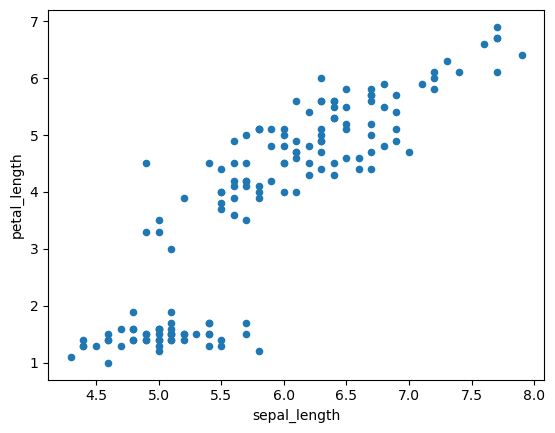

In [5]:
iris.plot(kind='scatter', x='sepal_length', y='petal_length')

A useful statistic for calculating the linear relation between two variable is the **Pearson correlation**.  
The Pearson correlation measures the linear relation between two numerical variables. The result is a number between -1 and 1 where
- -1 indicates a perfect negative linear relation
- 0 indicates that there is no linear relation
- 1 indicates a perfect positive linear relation

![](https://www.spss-tutorials.com/img/correlation-coefficient-multiple-scatterplots.png "Pearson correlation examples")

![](https://cdn1.byjus.com/wp-content/uploads/2019/06/word-image28.png "Pearson correlation formula")

In [6]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [7]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [8]:
irisCorrelations = iris.corr()
irisCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

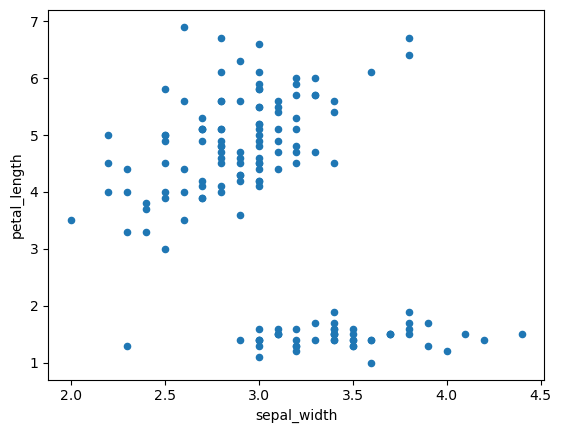

In [9]:
iris.plot(kind='scatter', x='sepal_width', y='petal_length')

In [10]:
import numpy as np

In [11]:
exampleData = pd.Series(range(100)) + 1
exampleDataNegative = -exampleData
exampleDataDouble = exampleData * 2
exampleDataSquared = exampleData ** 2
exampleDataRoot = exampleData ** 0.5

exampleDataExponential = 2 ** exampleData
exampleDataLog = np.log2(exampleData)

exampleDataWithSmallNoise = exampleData + np.random.randint(low=0, high=10, size=len(exampleData))
exampleDataWithMediumNoise = exampleData + np.random.randint(low=0, high=100, size=len(exampleData))
exampleDataWithHeavyNoise = exampleData + np.random.randint(low=0, high=1000, size=len(exampleData))

exampleDataFrame = pd.DataFrame({'original':exampleData, 'negative':exampleDataNegative, 'double':exampleDataDouble, 'squared':exampleDataSquared, 'root': exampleDataRoot, 'exp':exampleDataExponential, 'log':exampleDataLog, 'noiseSmall': exampleDataWithSmallNoise, 'noiseMedium': exampleDataWithMediumNoise, 'noiseHeavy':exampleDataWithHeavyNoise })

In [12]:
exampleDataFrame.head()

,original,negative,double,squared,root,exp,log,noiseSmall,noiseMedium,noiseHeavy
0,1,-1,2,1,1.000000,2,0.000000,1,96,434
1,2,-2,4,4,1.414214,4,1.000000,4,35,138
2,3,-3,6,9,1.732051,8,1.584963,4,95,280
3,4,-4,8,16,2.000000,16,2.000000,13,93,248
4,5,-5,10,25,2.236068,32,2.321928,12,77,326


In [13]:
exampleDataCorrelations = exampleDataFrame.corr()
exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\joyan\AppData\Local\Temp\ipykernel_15000\2884428394.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,original,negative,double,squared,root,exp,log,noiseSmall,noiseMedium,noiseHeavy
original,1.00,-1.00,1.00,0.97,0.98,-0.01,0.90,0.99,0.68,0.09
negative,-1.00,1.00,-1.00,-0.97,-0.98,0.01,-0.90,-0.99,-0.68,-0.09
double,1.00,-1.00,1.00,0.97,0.98,-0.01,0.90,0.99,0.68,0.09
squared,0.97,-0.97,0.97,1.00,0.91,-0.01,0.78,0.96,0.69,0.08
root,0.98,-0.98,0.98,0.91,1.00,-0.00,0.96,0.98,0.64,0.10
exp,-0.01,0.01,-0.01,-0.01,-0.00,1.00,-0.00,-0.01,0.07,0.10
log,0.90,-0.90,0.90,0.78,0.96,-0.00,1.00,0.90,0.55,0.12
noiseSmall,0.99,-0.99,0.99,0.96,0.98,-0.01,0.90,1.00,0.66,0.07
noiseMedium,0.68,-0.68,0.68,0.69,0.64,0.07,0.55,0.66,1.00,0.10
noiseHeavy,0.09,-0.09,0.09,0.08,0.10,0.10,0.12,0.07,0.10,1.00


<AxesSubplot:>

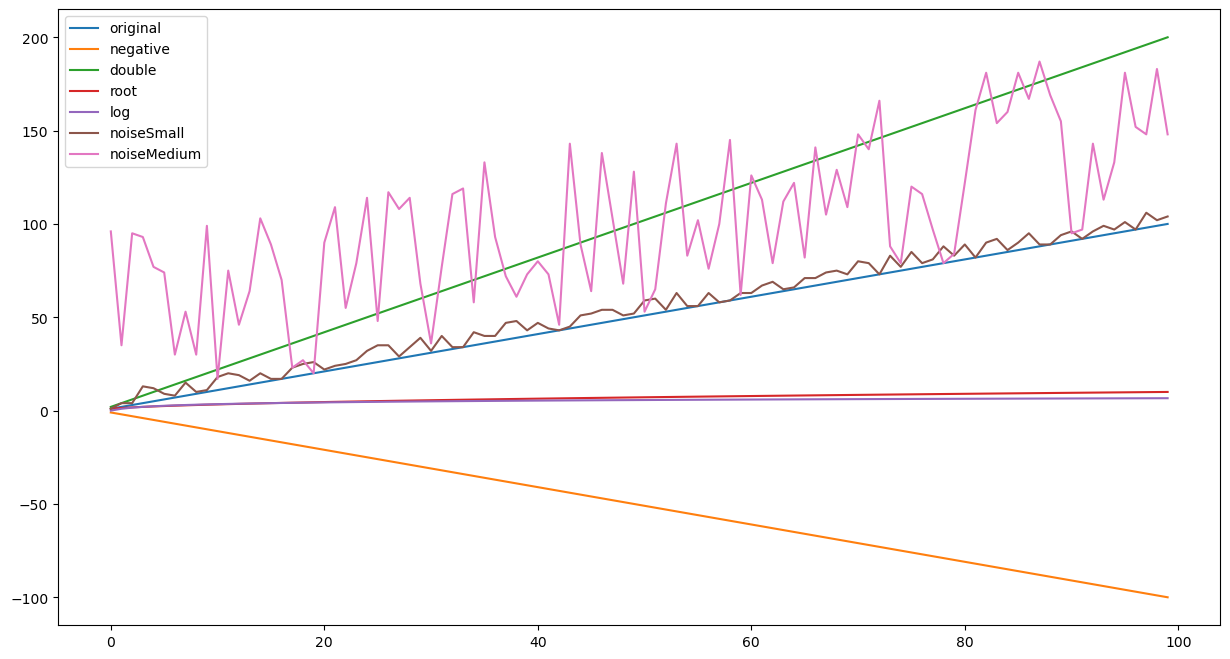

In [14]:
# Excluding a couple of columns because their values are too high to show in the same plot
exampleDataFrame.drop(['exp', 'squared' , 'noiseHeavy'], axis=1).plot(figsize=(15,8))

### Portfolio assignment 9
25 min: Perform a bivariate analysis on the columns with numerical data in the penguins dataset.
- Use corr() on the DataFrame to calculate all the correlations. Use the code example above to show the correlation table with colors.
- Look at the corrrelations. Do they match your expectations?
- Show a scatter plot for
 - The strongest positive correlation
 - The strongest negative correlation
 - The weakest correlation

In [15]:
penguins = sns.load_dataset("penguins")

In [16]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


![](https://www.galapagos.org/wp-content/uploads/2019/04/PenguinMeasurements_BLOGv3.png)

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 10
15 min: Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you chose in portfolio assignment 4. Does the correlation and scatter plot match your expectations? Add your answer to your notebook. Commit the Notebook to your portfolio when you're finished. 

![](https://i.imgur.com/0v1CGNV.png)

## Numerical VS Categorical

Examples:
- Monthly earnings VS Highest obtained degree
- Body length VS Country of origin
- Happiness rating VS Country of origin
- Sales VS Account Manager. 
- Revenue VS Product Category
- Revenue VS Game genre
- Retention VS Software version
- ...

In univariate analysis for numerical data we've looked at confidence intervals. We can use these to check if there are any signicant differences between categories.

You and I are are going to roll a 6-sided die. The numerical variable is the value we roll and the categorical variable is who rolled it. We know that in reality the average value of a 6-sided die is 3.5 (=(1+2+3+4+5+6)/6). We know that there is no skill involved, so who rolls the die should have no impact on the result. We each roll the die 3 times.
    <img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [17]:
diceRolls = pd.DataFrame(data= {'Person': ['you', 'you', 'you', 'me','me','me'], 'Rolls': [6,3,6,2,4,2]})
diceRolls

,Person,Rolls
0,you,6
1,you,3
2,you,6
3,me,2
4,me,4
5,me,2


In [18]:
diceRolls.groupby(by="Person").mean()

,Rolls
Person,
me,2.666667
you,5.000000


Looks like you rolled an average value of 5 and I rolled an average value of ~2.7. Does this mean you are better at rolling dice than me?

<AxesSubplot:xlabel='Person', ylabel='Rolls'>

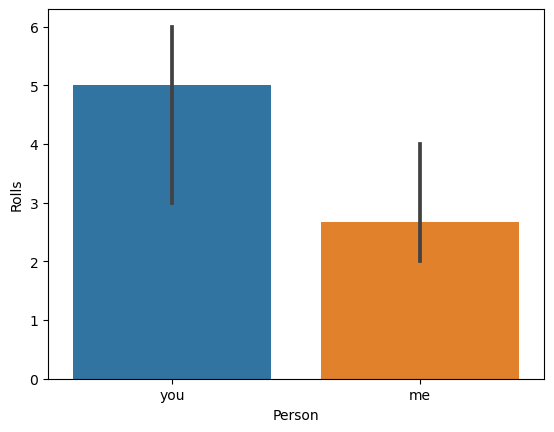

In [19]:
sns.barplot(x="Person", y="Rolls", data=diceRolls)

The confidence intervals overlap. This means that we can not yet be sure that you're a better dice roller than me. If we want the confidence intervals to become smaller, we'll need more data which means we need to do more dice rolls.

Let's look if there are significant difference between iris species.

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

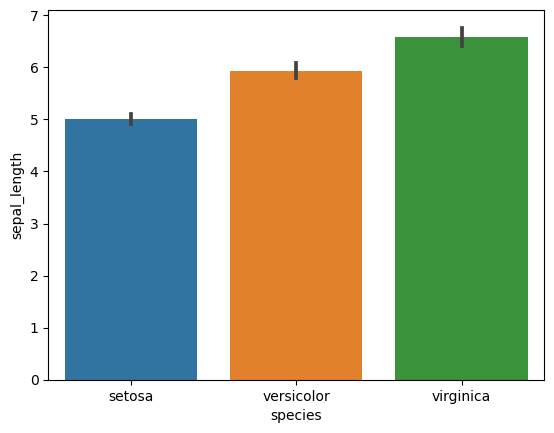

In [22]:
sns.barplot(y="sepal_length", x="species", data=iris) 
# Add parameter ci if you want to change certainty of confidence interval. 
# For example ci = 99 for 99% certainty.
# The default is 95%

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

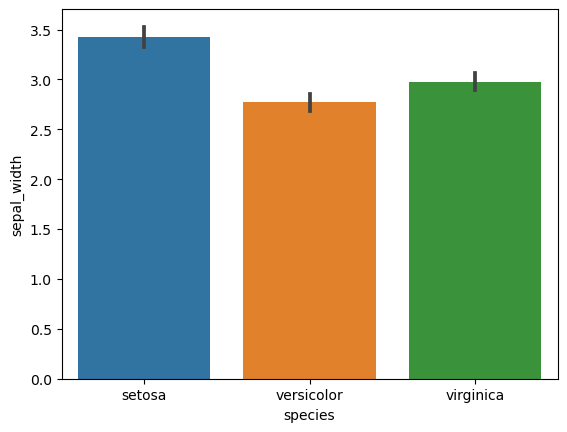

In [23]:
sns.barplot(y="sepal_width", x="species", data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

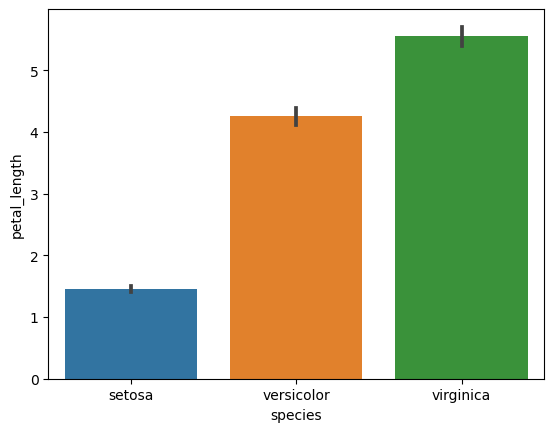

In [24]:
sns.barplot(y="petal_length", x="species", data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

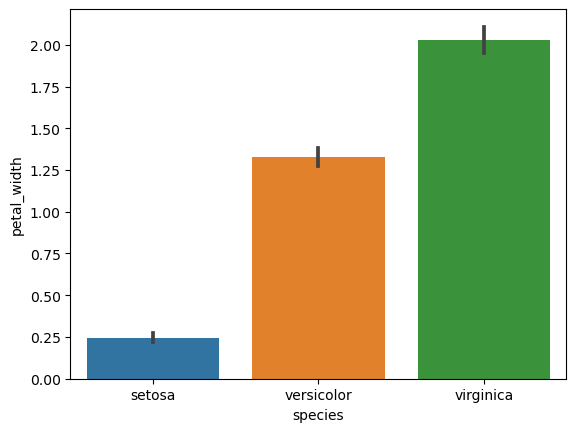

In [25]:
sns.barplot(y="petal_width", x="species", data=iris)

### Portfolio assignment 11
20 min: Do a Numerical VS Categorical bivariate analysis on the penguins dataset.
- Choose one of the categorical columns: species, island or sex
- use .groupby('<columnname>').mean() too look at the means of the numerical columns. Does it look like there is a difference between categories?
- Use the seaborn barplot to plot the mean and confidence. Create this plot for each of the numerical columns (bill_length_mm	bill_depth_mm, flipper_length_mm, body_mass_g)
- For each of the plots, write a conclusion: Is there a statistically significant difference for this numerical column for each category?
- Optional: Repeat this proces for the other two categorical columns

In [26]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


![](https://www.galapagos.org/wp-content/uploads/2019/04/PenguinMeasurements_BLOGv3.png)

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

![](https://i.imgur.com/0v1CGNV.png)

## Categorical VS Categorical

Examples:
- Inbound channel VS Type of customer
- Education VS Job function
- Region of citizen VS Who the citizen votes for
- Color shirt of crew member in Stat Trek VS Does the crew member survive? (https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/)
- Customer newsletter subscription (Yes/No) VS Custom churn (Yes/No)
- Penguin island VS Penguin species
- ...

In [27]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:>

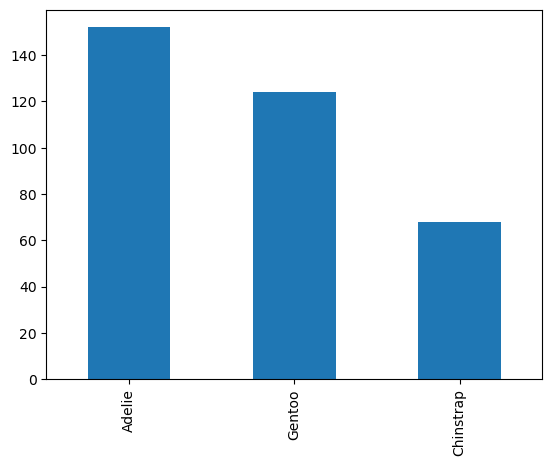

In [28]:
penguins.species.value_counts().plot(kind='bar')

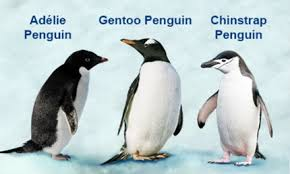

<AxesSubplot:>

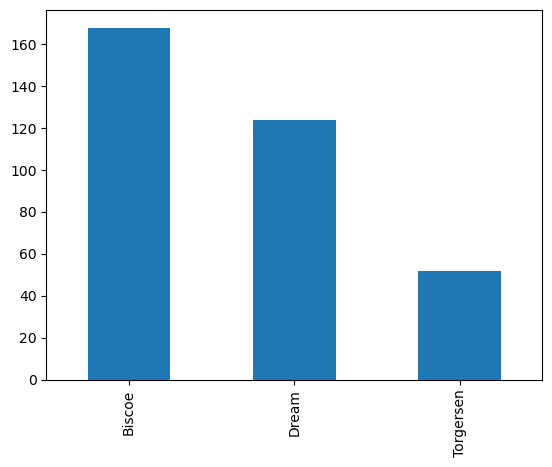

In [29]:
penguins['island'].value_counts().plot(kind='bar')

In [30]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [31]:
penguinsContingencyTable = create_contingency_table(penguins, 'species','island')

<AxesSubplot:xlabel='island'>

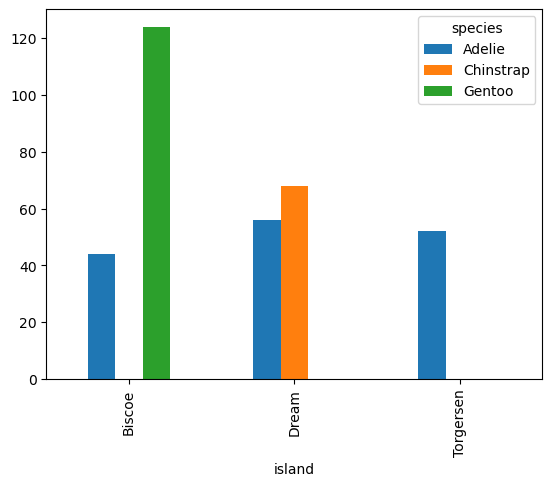

In [32]:
penguinsContingencyTable.plot(kind='bar')

In [33]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [34]:
check_cat_vs_cat_correlation(penguins, 'species','island')

The odds of a correlation between species and island is 100.0% (Based on a p value of 1.3545738297192517e-63).
This percentage needs to be at least 95% for a significant correlation.


![](https://1000logos.net/wp-content/uploads/2021/01/Suitmarks-of-playing-cards.jpg)

In [35]:
cardThrows = pd.DataFrame(data= {'Person': ['you', 'you', 'you', 'me','me','me'], 'Throws': ['spades','hearts','clubs','spades', 'hearts','diamonds']})

In [36]:
cardThrows

,Person,Throws
0,you,spades
1,you,hearts
2,you,clubs
3,me,spades
4,me,hearts
5,me,diamonds


In [37]:
contingencyTableCardThrows = create_contingency_table(cardThrows, 'Person','Throws')

<AxesSubplot:xlabel='Throws'>

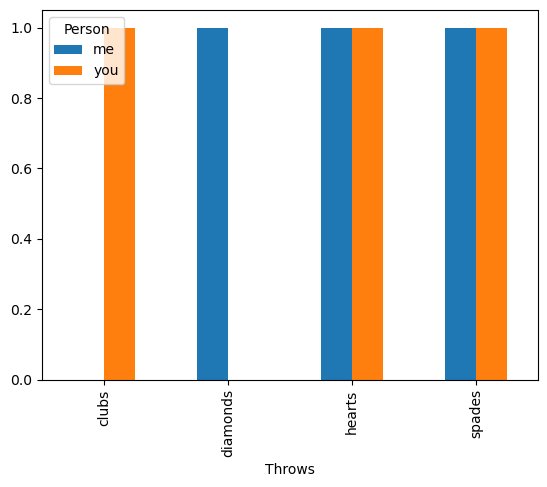

In [38]:
contingencyTableCardThrows.plot(kind='bar')

In [39]:
check_cat_vs_cat_correlation(cardThrows, 'Person','Throws')

The odds of a correlation between Person and Throws is 42.75932955291202% (Based on a p value of 0.5724067044708798).
This percentage needs to be at least 95% for a significant correlation.


![](https://miro.medium.com/max/532/1*S8rfFkmLhDbOz4RGNwuz6g.png)

In [40]:
# Change the numberOfRolls and low & high of each player to see the impact on the chi-square test.
numberOfThrows = 30
person1Throws= pd.Series( np.random.choice(['spades','hearts','clubs', 'diamonds'], size=numberOfThrows ))
person2Throws= pd.Series( np.random.choice(['spades','hearts','clubs'], size=numberOfThrows ))

cardThrows2 = pd.DataFrame({
    'Person':pd.concat([pd.Series(['Person1']*numberOfThrows),pd.Series(['Person2']*numberOfThrows)]),
    'Throws':pd.concat([person1Throws,person2Throws])
})
cardThrows2.head()

,Person,Throws
0,Person1,clubs
1,Person1,hearts
2,Person1,spades
3,Person1,clubs
4,Person1,spades


In [41]:
contingencyTableCardThrows2 = create_contingency_table(cardThrows2, 'Person','Throws')

<AxesSubplot:xlabel='Throws'>

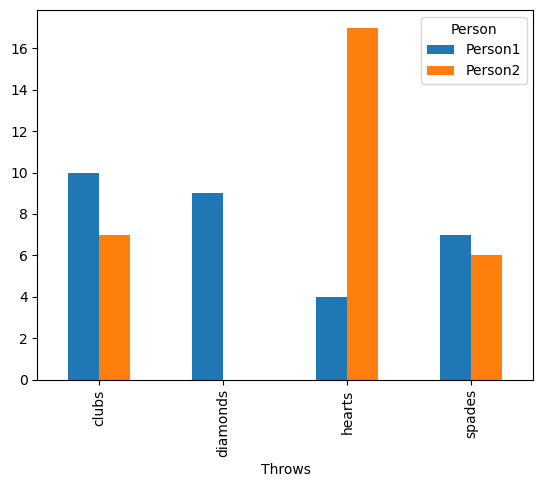

In [42]:
contingencyTableCardThrows2.plot(kind='bar')

In [43]:
check_cat_vs_cat_correlation(cardThrows2, 'Person','Throws')

The odds of a correlation between Person and Throws is 99.94816298271351% (Based on a p value of 0.000518370172864781).
This percentage needs to be at least 95% for a significant correlation.


### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)